In [4]:
import numpy as np
import matplotlib.pyplot as plt

import polyseq as pseq

%matplotlib inline
np.random.seed(42)

In [6]:
data_brain.to_pickle("/Users/jason/Documents/data/fly-rnaseq/sample_19_brain/data.pkl")

In [9]:
data_brain.to_cellranger("/Users/jason/Documents/data/fly-rnaseq/test/")

In [12]:
data_brain.downsample(number=500).to_cellranger("/Users/jason/code/github/polyseq/examples/sample_19_brain_downsampled/")

In [13]:
data_vnc.downsample(number=500).to_cellranger("/Users/jason/code/github/polyseq/examples/sample_20_VNC_downsampled/")

In [15]:
# pseq.io.download_example_data()

# data = pseq.io.load_example()

data_brain = pseq.io.read_cellranger("/Users/jason/code/github/polyseq/examples/sample_19_brain_downsampled/")
data_vnc = pseq.io.read_cellranger("/Users/jason/code/github/polyseq/examples/sample_20_VNC_downsampled/")

data = pseq.concat(data_brain, data_vnc)

data

Nep3  tRNA:Pro-CGG-1-1  CG9570  Or19b  CG15322  Or19a  karr  \
sample cell                                                                
0      0        0                 0       0      0        0      0     0   
       1        0                 0       0      0        0      0     0   
       2        0                 0       0      0        0      0     0   
       3        0                 0       0      0        0      0     0   
       4        0                 0       0      0        0      0     0   
       5        0                 0       0      0        0      0     0   
       6        0                 0       0      0        0      0     0   
       7        0                 0       0      0        0      0     0   
       8        0                 0       0      0        0      0     0   
       9        0                 0       0      0        0      0     0   
       10       1                 0       0      0        0      0     0   
       11       0                 0       0      0        0      0     0   
       12       0                 0       0      0        0      0     0   
       13       0                 0       0      0        0      0     0   
       14       0                 0       0      0        0      0     0   
       15       0                 0       0      0        0      0     0   
       16       0                 0       0      0        0      0     0   
       17       0                 0       0      0        0      0     0   
       18       0                 0       0      0        0      0     0   
       19       0                 0       0      0        0      0     0   
       20       0                 0       0      0        0      0     0   
       21       0                 0       0      0        0      0     0   
       22       0                 0       0      0        0      0     0   
       23       0                 0       0      0        0      0     0   
       24       0                 0       0      0        0      0     0   
       25       0                 0       0      0        0      0     0   
       26       0                 0       0      0        0      0     0   
       27       0                 0       0      0        0      0     0   
       28       0                 0       0      0        0      0     0   
       29       0                 0       0      0        0      0     0   
...           ...               ...     ...    ...      ...    ...   ...   
1      470      0                 0       0      0        0      0     0   
       471      0                 0       0      0        0      0     0   
       472      0                 0       0      0        0      0     0   
       473      0                 0       0      0        0      0     0   
       474      0                 0       0      0        0      0     0   
       475      0                 0       0      0        0      0     0   
       476      0                 0       0      0        0      0     0   
       477      0                 0       0      0        0      0     0   
       478      0                 0       0      0        0      0     0   
       479      0                 0       0      0        0      0     0   
       480      0                 0       0      0        0      0     0   
       481      0                 0       0      0        0      0     0   
       482      0                 0       0      0        0      0     0   
       483      0                 0       0      0        0      0     0   
       484      0                 0       0      0        0      0     0   
       485      0                 0       0      0        0      0     0   
       486      0                 0       0      0        0      0     0   
       487      0                 0       0      0        0      0     0   
       488      0                 0       0      0        0      0     0   
       489      0                 0       0      0        0  

In [17]:
dropped = data.drop_cells(umis=1).drop_genes(num_cells=1)
print(data.shape)
print(dropped.shape)

(1000, 17492)
(1000, 9302)


,min,max,mean,median
umis,0,2439,0,0
umis above 0,1,2439,3,1
umis per cell cell,1004,28751,2208,1578
genes expressed,331,3384,770,680
umis per gene,1,175549,237,30
cells expressing,0,1000,30,1


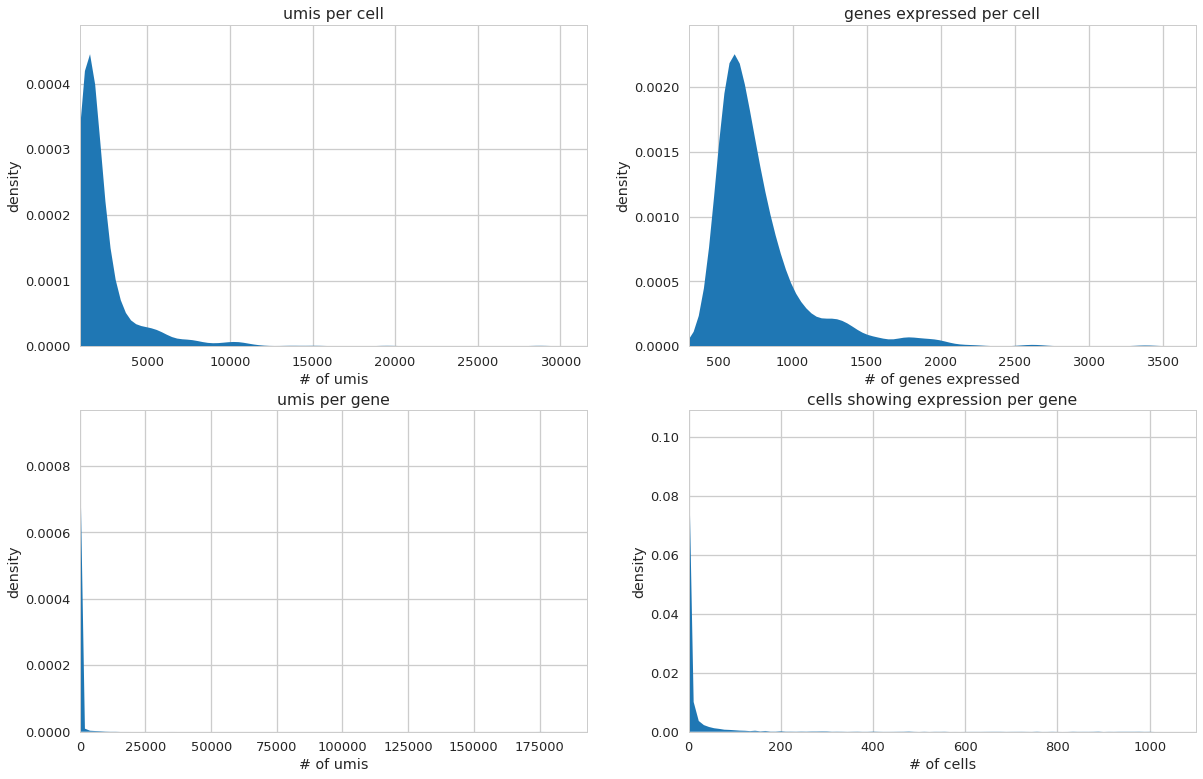

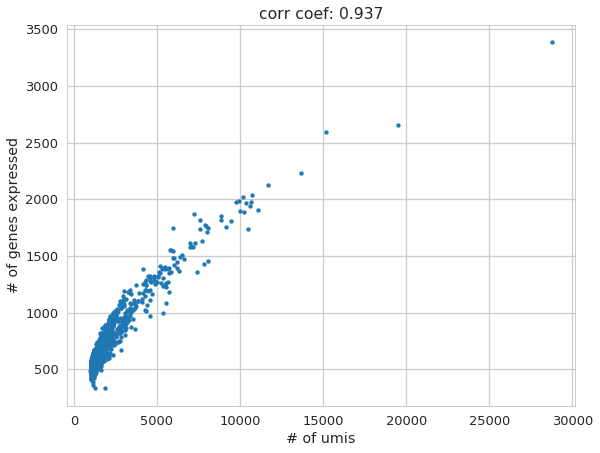

In [18]:
stats = pseq.summary.summarize(dropped)
stats

In [19]:
normed = dropped.log_normalize()
total = normed.sum(axis=1)
regressed = pseq.regress(normed, total[:, np.newaxis])
regressed.head()

Nep3   CG33217     Vps11     RpL10       G9a       cin  \
sample cell                                                               
0      0    -0.123260 -0.153940 -0.168442 -1.707557 -0.219111  0.013036   
       1    -0.127422 -0.173681 -0.171653 -1.820915 -0.238166 -0.009997   
       2    -0.118046 -0.129213 -0.164421  0.334000 -0.195244  0.041887   
       3    -0.129290 -0.182542  4.918915  0.725316 -0.246719 -0.020335   
       4    -0.122057 -0.148236 -0.167515 -0.834229 -0.213605  0.019692   

               CG3777   CG12470         y        ac    ...       CG5118  \
sample cell                                            ...                
0      0    -0.043238 -0.035789 -0.120221  0.024651    ...    -0.117142   
       1    -0.041799 -0.035273 -0.125087  0.017672    ...    -0.121646   
       2    -0.045039 -0.036435 -0.114127  0.033393    ...    -0.111501   
       3    -0.041154 -0.035041 -0.127271  0.014539    ...    -0.123668   
       4    -0.043653 -0.035938 -0.118815  0.026668    ...    -0.115841   

                 Plap    CG5080      Tfb4      Pino    CG4629         S  \
sample cell                                                               
0      0    -0.062677 -0.017050 -0.092067 -0.057951 -0.125216 -0.189039   
       1    -0.080807 -0.027728 -0.101770 -0.068087 -0.135005 -0.206194   
       2    -0.039967 -0.003674  6.006128 -0.045254 -0.112955 -0.167552   
       3    -0.088945 -0.032521 -0.106126 -0.072637 -0.139398 -0.213894   
       4    -0.057438 -0.013964 -0.089263 -0.055022 -0.122388 -0.184082   

                 EGFP  tdTomato      GAL4  
sample cell                                
0      0    -0.120408 -0.112374  0.000908  
       1    -0.123635 -0.119123 -0.008014  
       2    -0.116366 -0.103920  0.012083  
       3    -0.125083 -0.122152 -0.012019  
       4    -0.119476 -0.110424  0.003486  

[5 rows x 9302 columns]

pc-0      pc-1      pc-2      pc-3      pc-4      pc-5  \
sample cell                                                                
0      0      5.697379 -3.945341  2.192038  3.524047 -2.444727 -1.534017   
       1      3.160895 -5.369884  2.960216  6.117423 -1.430157 -1.205077   
       2     10.646570 -1.075091 -0.462844 -0.524879  0.048830  0.615290   
       3     15.733245 -2.103901 -2.177384  1.649063 -0.064659  2.361244   
       4     13.321009  1.314547 -1.707086 -2.255539  0.658212  0.879069   

                 pc-6      pc-7      pc-8      pc-9     pc-10     pc-11  \
sample cell                                                               
0      0     0.534186  1.660648  0.719234  0.250821  1.618302 -2.837001   
       1     0.012336  3.161893 -0.955122 -0.839579  1.174894 -4.953991   
       2    -0.226373 -0.454920  2.161005 -0.812288 -1.078097 -2.670383   
       3     0.932891 -1.178241  2.152458  0.901073 -0.089821 -2.330559   
       4    -0.600428 -0.481048  1.107830 -0.459877 -0.882939 -2.006126   

                pc-12     pc-13     pc-14  
sample cell                                
0      0     0.583043 -0.597719 -1.725592  
       1     1.372532 -0.758383 -0.957872  
       2     0.176671  1.017372 -1.838948  
       3     0.090159  0.637294 -0.880888  
       4     0.103646  2.279345  1.826278

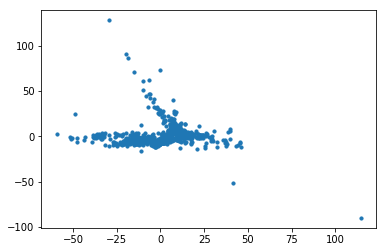

In [20]:
reduced = pseq.dim.pca(regressed, k=15)

plt.scatter(reduced['pc-0'], reduced['pc-1'], s=10)
reduced.head()

In [21]:
clustered = pseq.clustering.graph_cluster(reduced, n_neighbors=100)
print("# of clusters: {}".format(np.unique(clustered.index.labels[2]).shape[0]))
clustered.head()

Finding 100 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.11290311813354492 seconds
Jaccard graph constructed in 0.7015821933746338 seconds
Wrote graph to binary file in 0.24962711334228516 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.733079
Louvain completed 21 runs in 0.5775039196014404 seconds
PhenoGraph complete in 1.7053272724151611 seconds
# of clusters: 6


pc-0      pc-1      pc-2      pc-3      pc-4  \
sample cell cluster                                                      
0      0    1         5.697379 -3.945341  2.192038  3.524047 -2.444727   
       1    1         3.160895 -5.369884  2.960216  6.117423 -1.430157   
       2    0        10.646570 -1.075091 -0.462844 -0.524879  0.048830   
       3    0        15.733245 -2.103901 -2.177384  1.649063 -0.064659   
       4    0        13.321009  1.314547 -1.707086 -2.255539  0.658212   

                         pc-5      pc-6      pc-7      pc-8      pc-9  \
sample cell cluster                                                     
0      0    1       -1.534017  0.534186  1.660648  0.719234  0.250821   
       1    1       -1.205077  0.012336  3.161893 -0.955122 -0.839579   
       2    0        0.615290 -0.226373 -0.454920  2.161005 -0.812288   
       3    0        2.361244  0.932891 -1.178241  2.152458  0.901073   
       4    0        0.879069 -0.600428 -0.481048  1.107830 -0.459877   

                        pc-10     pc-11     pc-12     pc-13     pc-14  
sample cell cluster                                                    
0      0    1        1.618302 -2.837001  0.583043 -0.597719 -1.725592  
       1    1        1.174894 -4.953991  1.372532 -0.758383 -0.957872  
       2    0       -1.078097 -2.670383  0.176671  1.017372 -1.838948  
       3    0       -0.089821 -2.330559  0.090159  0.637294 -0.880888  
       4    0       -0.882939 -2.006126  0.103646  2.279345  1.826278

In [22]:
tsne = pseq.dim.tsne(reduced, perplexity=10.0, verbose=True)
tsne.head()

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.832943
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.703911
[t-SNE] Error after 1000 iterations: 0.837053


tsne-0     tsne-1
sample cell cluster                      
0      0    1       -26.224768 -39.211933
       1    1       -20.694601 -51.808266
       2    0       -22.322594 -10.880738
       3    0       -33.690910  -4.389788
       4    0       -18.486717   1.932343

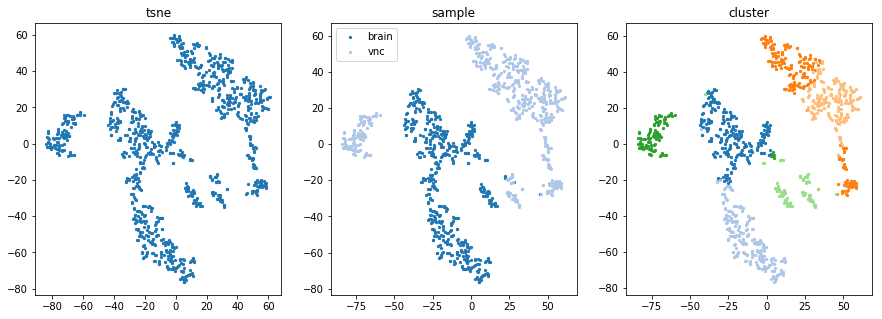

In [23]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
pseq.viz.scatter(tsne, s=5, cmap="tab20")
plt.title('tsne')

plt.subplot(1, 3, 2)
pseq.viz.scatter(tsne, color_by="sample", s=5, cmap="tab20")
plt.title('sample')
plt.legend(["brain", "vnc"], scatterpoints=1)

plt.subplot(1, 3, 3)
pseq.viz.scatter(tsne, color_by="cluster", s=5, cmap="tab20")
plt.title('cluster')

plt.savefig("/Users/jason/Desktop/brain-vnc.png")

plt.show()

In [9]:
top_genes = pseq.upregulated(normed, clusters, n=3)

print("\n\n---\n")
for i, genes in enumerate(top_genes):
    print(genes)

finding genes for cluster 1
[LibLinear]finding genes for cluster 2
[LibLinear]finding genes for cluster 3
[LibLinear]finding genes for cluster 4
[LibLinear]finding genes for cluster 5
[LibLinear]

---

['futsch', '14-3-3zeta', 'Cam']
['Hsp23', 'sbb', 'wde']
['pros', 'jim', 'RpS29']
['fabp', 'Obp44a', 'CAH1']
['CR43283', 'CG3800', 'Pen']


/Users/jason/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)


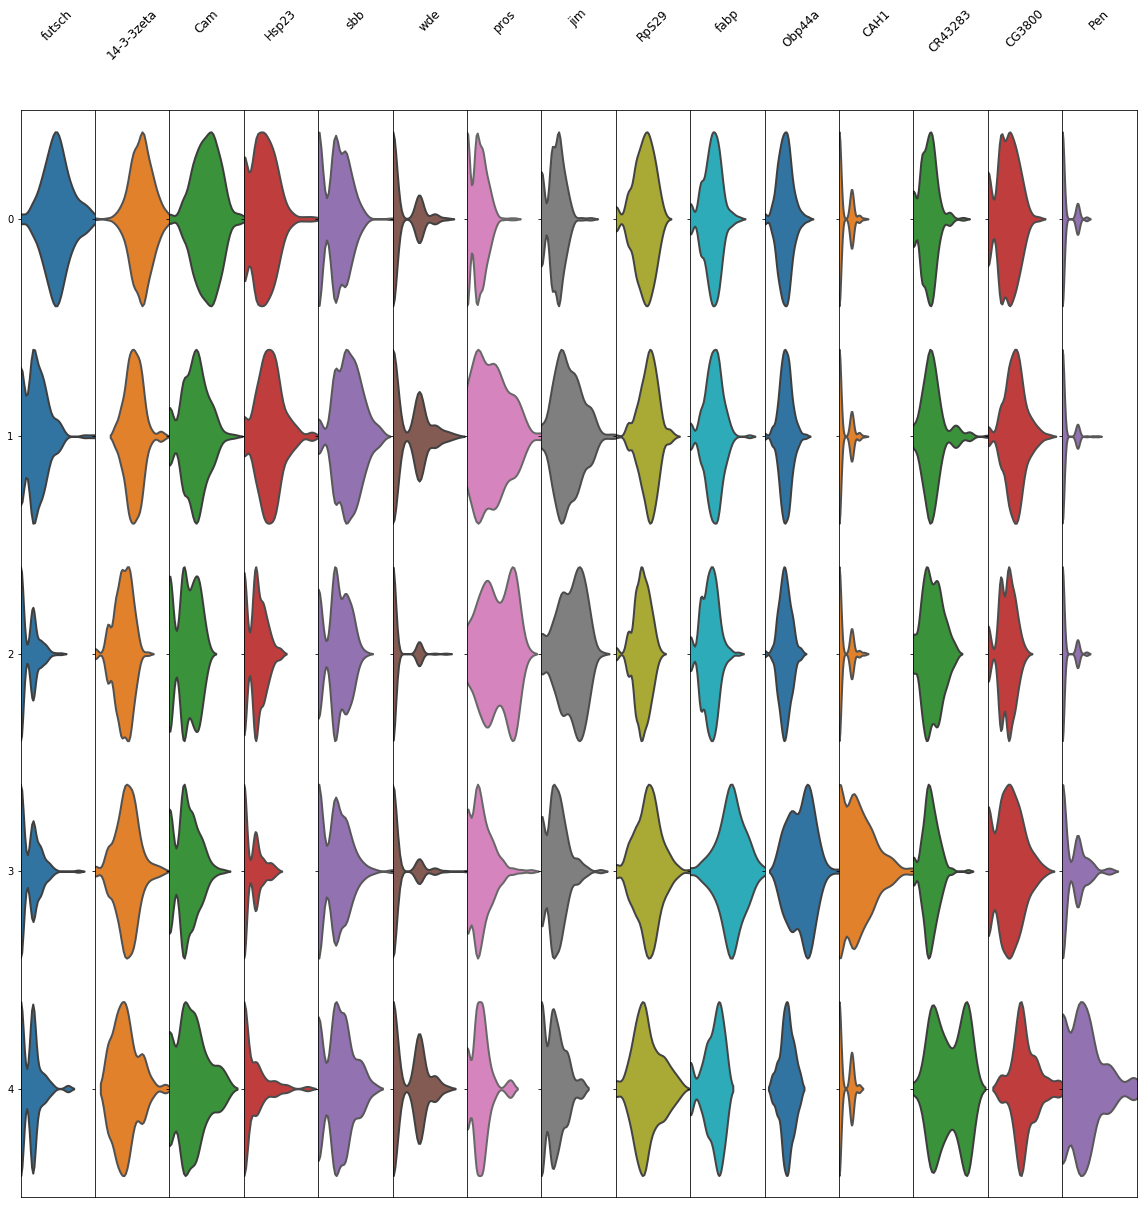

In [10]:
genes = sum(top_genes, []) # append all lists into single list
pseq.viz.violins(normed, genes, groups=clusters, cluster_genes=False)